Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

load dataset

In [16]:
# load dataset
data=pd.read_csv(r'train.csv')

print(data.head())

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0


Data Inspection

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


Data Preprocessing

In [18]:
# vetorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['sms'])

Model Training

In [19]:
# splitting into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.3, random_state=42)
# train
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
# prediction
y_pred = mnb.predict(X_test)

Performance Evaluation

In [20]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 98.51%
Precision: 0.93
Recall: 0.96
Confusion Matrix:
[[1431   16]
 [   9  217]]


Visualization

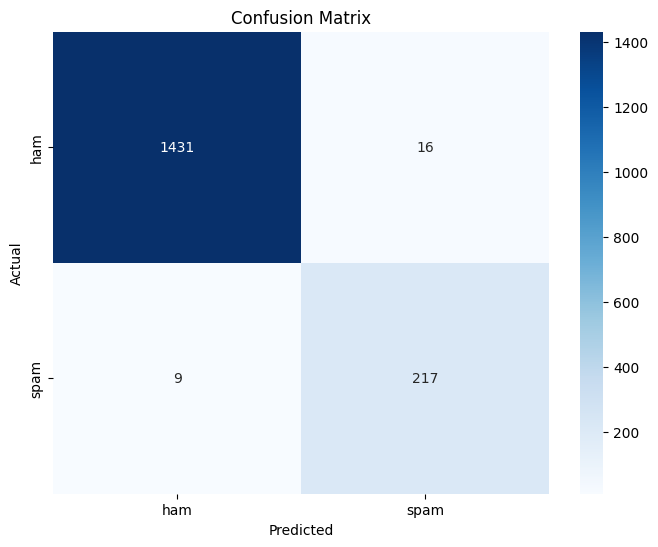

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()